Data Preprocessing

importing libraries

In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error, confusion_matrix,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import warnings
warnings.filterwarnings("ignore")

Loading Data

In [4]:
data=pd.read_csv('concrete_data.csv')

In [6]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
data.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [10]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [12]:
data.shape

(1030, 9)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [16]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Finding Null values 

In [18]:
data.isnull().any()

cement                           False
blast_furnace_slag               False
fly_ash                          False
water                            False
superplasticizer                 False
coarse_aggregate                 False
fine_aggregate                   False
age                              False
concrete_compressive_strength    False
dtype: bool

In [20]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

Data visualization

<Axes: >

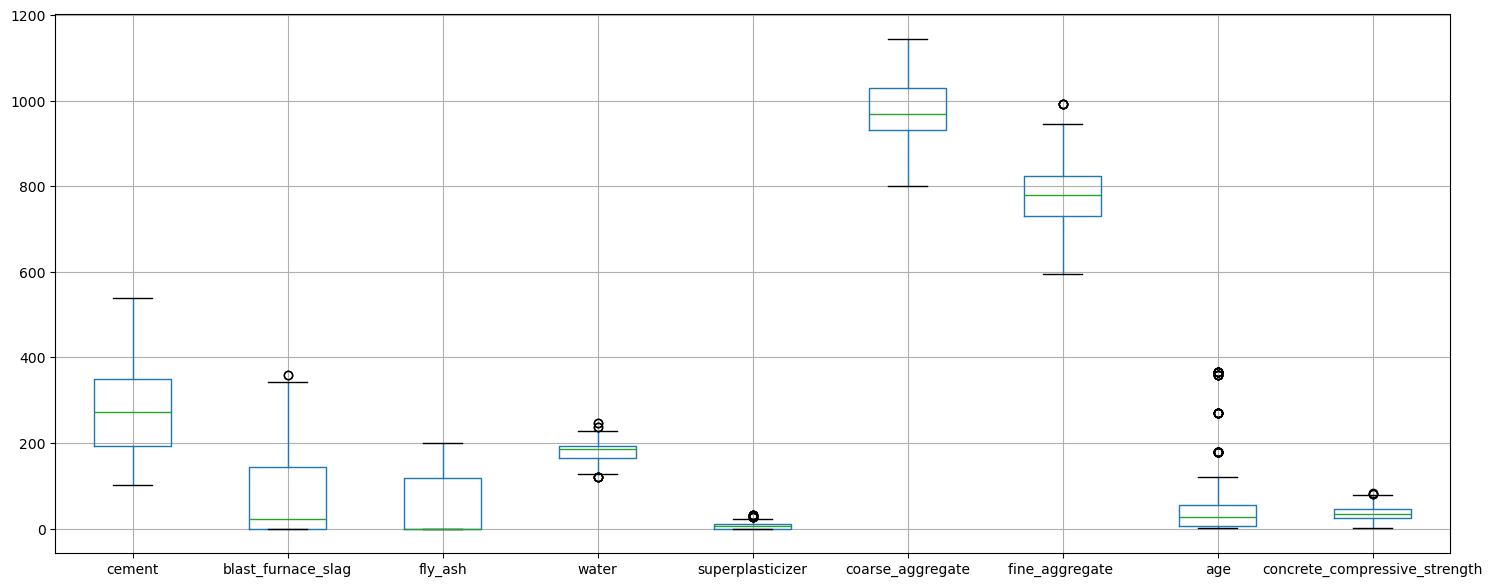

In [22]:
data.boxplot(figsize=(18,7))

Outliers treatment:

In [24]:
# Define a function to handle outliers using the IQR method
def handle_outliers(df):
    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
            df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df



In [26]:
# Apply the outlier treatment function to the data
data = handle_outliers(data)

In [63]:
data.boxplot(figsize=(18,7))

<Axes: xlabel='concrete_compressive_strength', ylabel='Count'>

Univariate Analysis

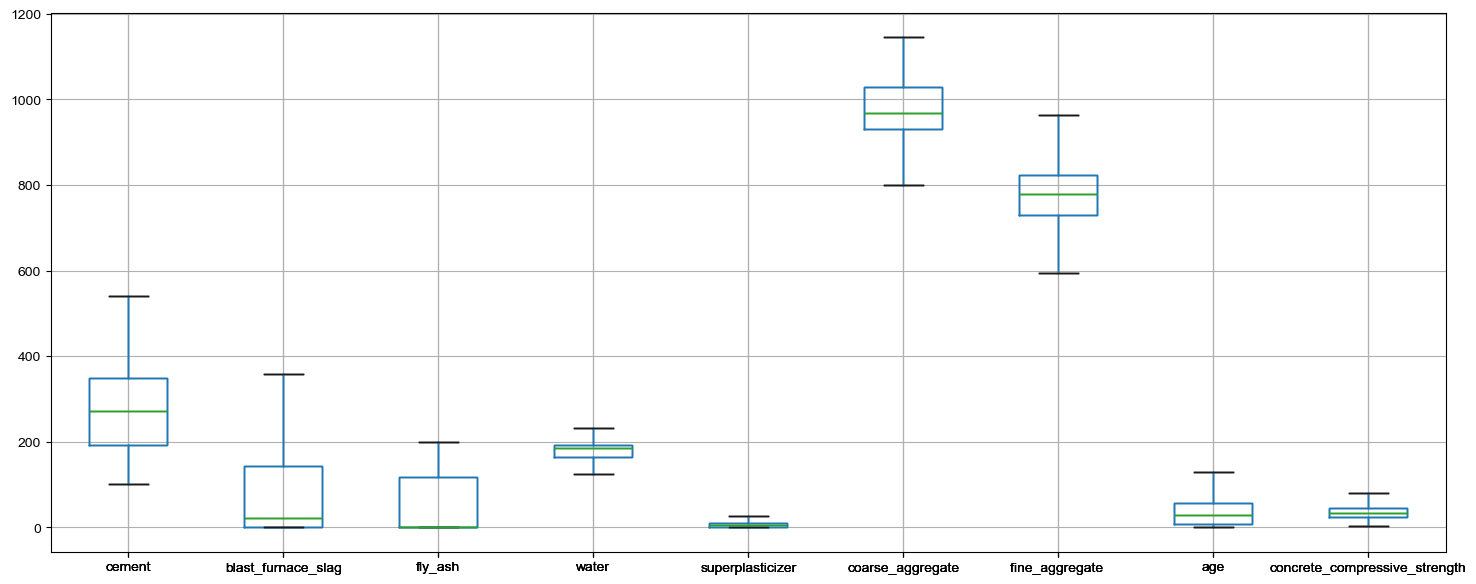

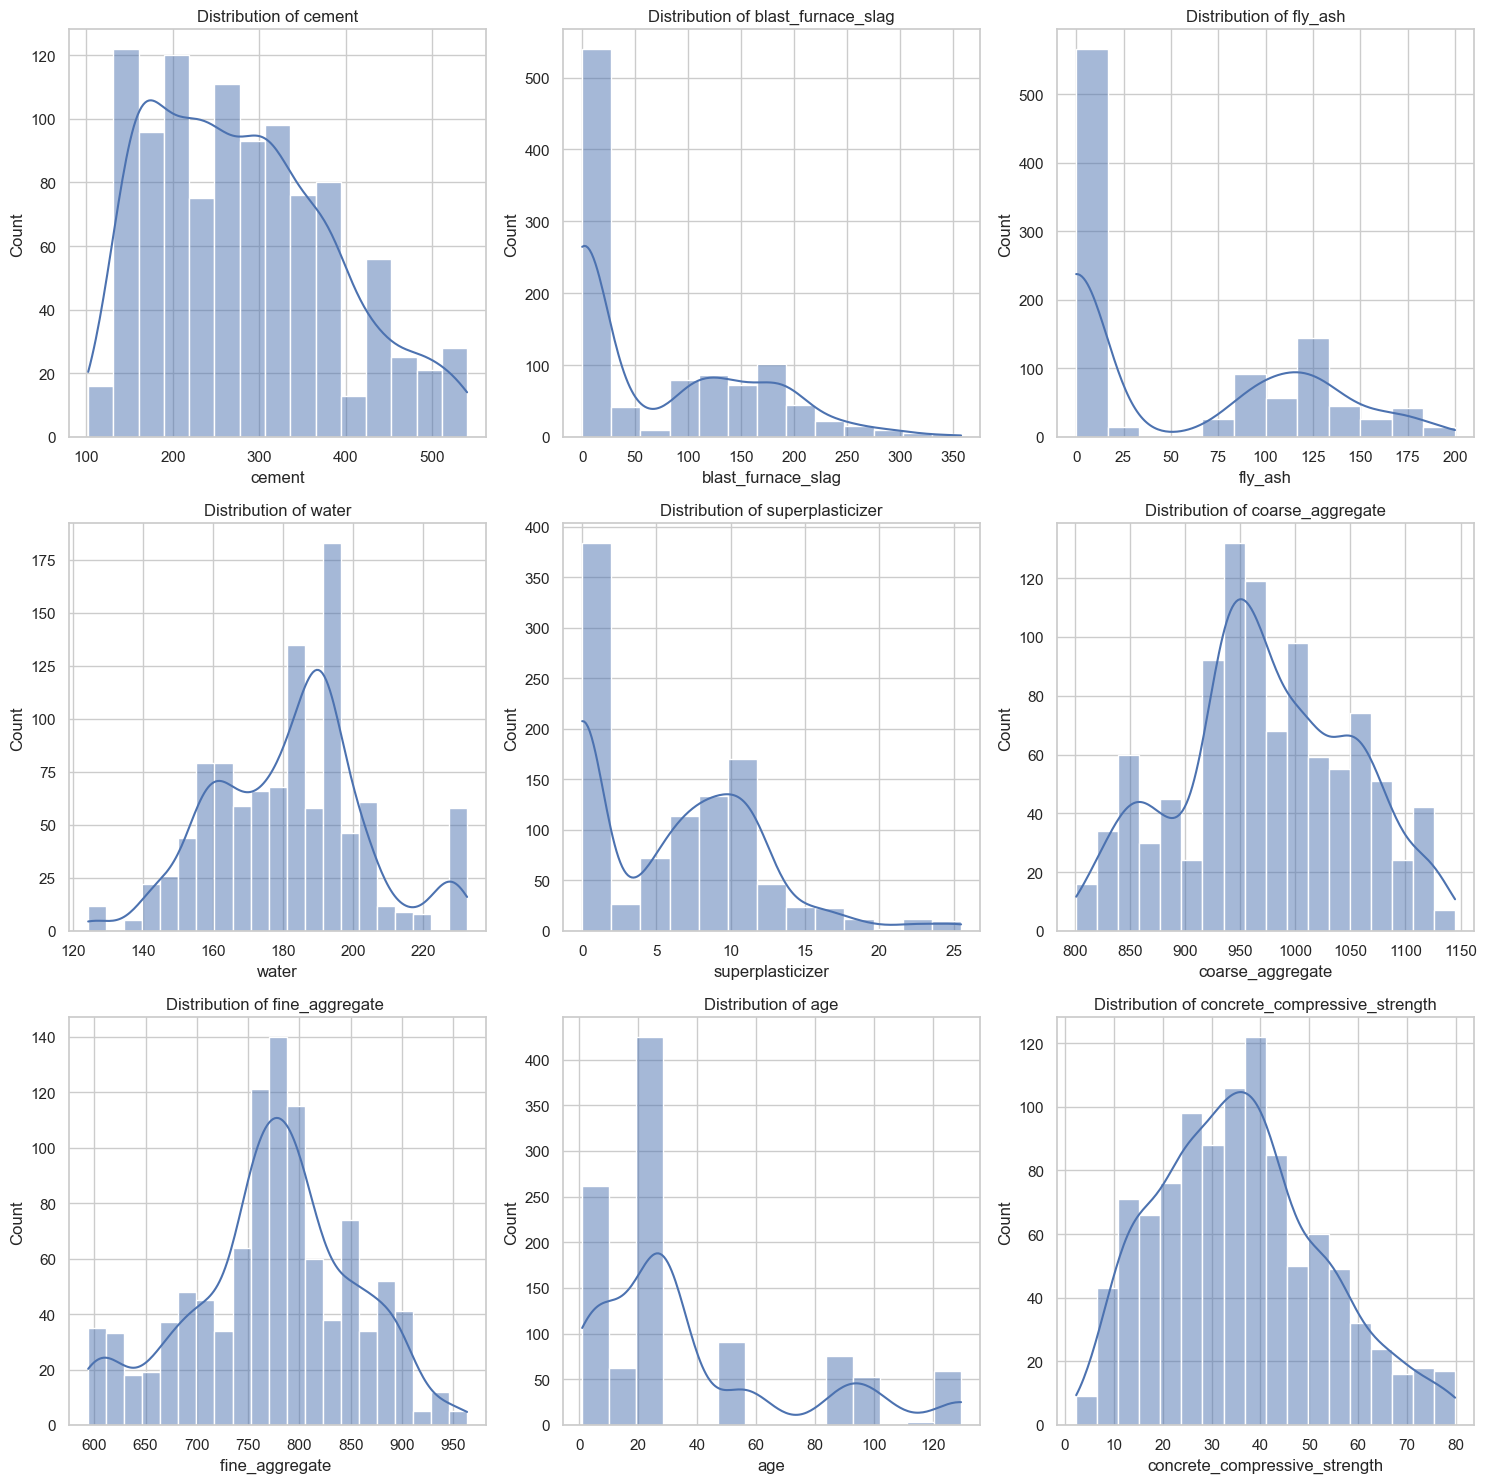

In [34]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of each feature
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, column in enumerate(data.columns):
    sns.histplot(data[column], ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()


Bivariate Analysis

In [36]:
data.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275239,-0.397467,-0.081617,0.079619,-0.109349,-0.225311,0.054325,0.498008
blast_furnace_slag,-0.275239,1.000000,-0.323590,0.107031,0.043724,-0.284023,-0.283263,-0.052703,0.134621
fly_ash,-0.397467,-0.323590,1.000000,-0.258379,0.395319,-0.009961,0.080962,-0.092704,-0.105577
water,-0.081617,0.107031,-0.258379,1.000000,-0.665260,-0.180249,-0.448979,0.189637,-0.290969
superplasticizer,0.079619,0.043724,0.395319,-0.665260,1.000000,-0.261624,0.216947,-0.122913,0.366235
coarse_aggregate,-0.109349,-0.284023,-0.009961,-0.180249,-0.261624,1.000000,-0.176542,0.012295,-0.165250
fine_aggregate,-0.225311,-0.283263,0.080962,-0.448979,0.216947,-0.176542,1.000000,-0.096565,-0.169601
age,0.054325,-0.052703,-0.092704,0.189637,-0.122913,0.012295,-0.096565,1.000000,0.469807
concrete_compressive_strength,0.498008,0.134621,-0.105577,-0.290969,0.366235,-0.165250,-0.169601,0.469807,1.000000


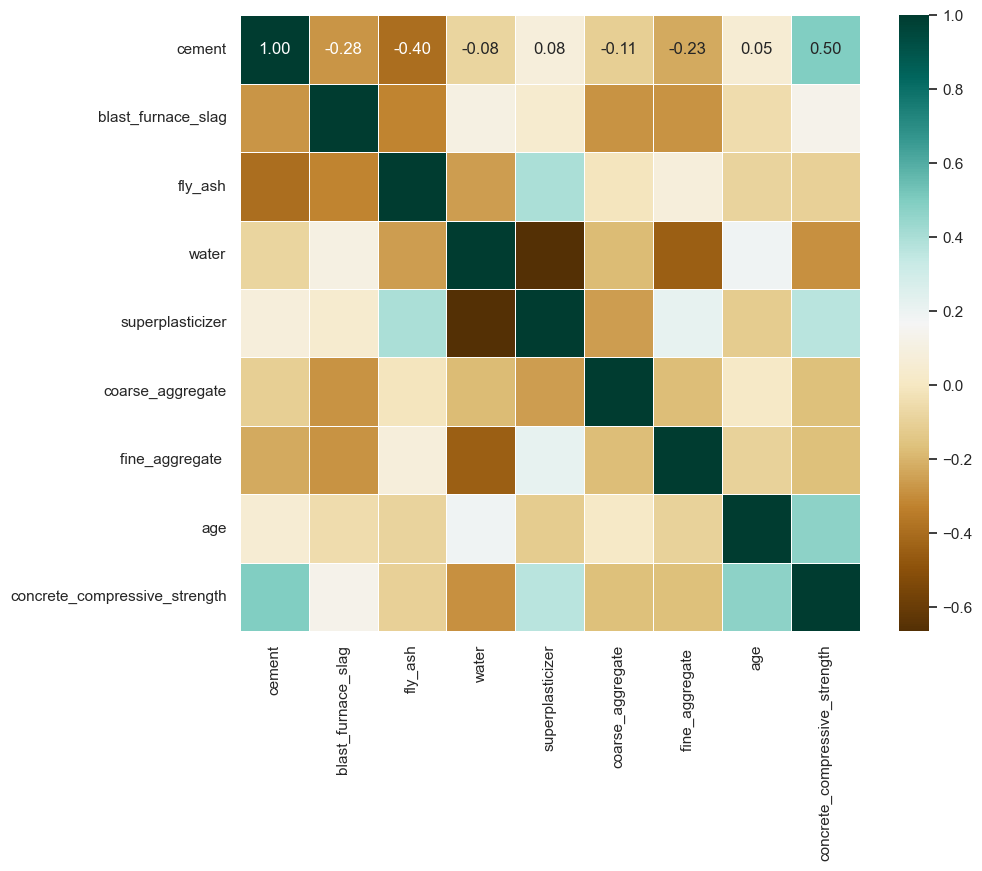

In [38]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(data.corr(), annot=True, cmap='BrBG', fmt=".2f", linewidths=0.5)
plt.show()

In [40]:
sns.pairplot(data)

Save Data

In [55]:
data.to_csv('preprocessed_data.csv')

#splitting data

In [42]:
x=pd.DataFrame(data,columns=data.columns[:8])
y=pd.DataFrame(data,columns=data.columns[8:])

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Model Building

Before Hyperparameter Tuning

In [59]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pre=gb.predict(x_test)
print(y_pre)
print("R2 score :" ,r2_score(y_test,y_pre))

[21.82070532 13.1042572  24.64318662 11.06651413 33.01836083 64.95302827
 18.46578502 48.78788804 41.00279713 20.00890985 39.35120074 14.66248401
 37.16902304 31.79163442  7.91373603 28.18750762 38.89406596 60.64051274
 54.22736858 36.09547946 22.55190114 49.84132526 17.12041201 58.78867676
 60.25411081 39.55212361 33.6331268  30.59715648 35.97789452 13.85186581
 42.93949106 55.53748578 26.44513528 24.80101498 34.95408601 39.47127411
 16.36167731 26.18622283 25.83782066 14.81126689 40.15537762 13.45445264
 47.03776046 38.16860149 35.53756216 28.57317895 33.38176817 27.16209067
 33.63259684 51.21249233 25.485741   35.19397883 61.84028332 52.82356174
 55.92243839  9.34429527 38.22538253 23.13917703 33.4241584  44.38679842
 49.20104027 42.31787713 51.38843738 49.86241351 23.01972362 35.26219556
 49.51722099 35.11448749 41.32282919 27.86216998 30.34268673 26.85371844
 39.47127411 12.81608874 66.61571836 58.93472439 52.58679765 15.25653134
 60.89730701 42.53784244 38.12315182 44.08526579 48

After Hyperparameter Tuning

In [48]:
gbr = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit Grid Search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters from the Grid Search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model using the best parameters
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = best_model.predict(x_test)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.9}


Model Evaluation

In [51]:
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("Root Mean Square Error:", np.sqrt(mean_absolute_error(y_test,y_pred)))
print("R2 score :" ,r2_score(y_test,y_pred))

Mean Absolute Error: 3.2827032042535604
Mean Squared Error: 22.38162773605611
Root Mean Square Error: 1.8118231713535293
R2 score : 0.9137489588786115


In [53]:
pickle.dump(best_model,open('cement.pkl','wb'))

In [61]:
pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.1
anaconda-project                  0.11.1
anyio              